### 双层神经网络实现非线性回归
加载自定义数据：

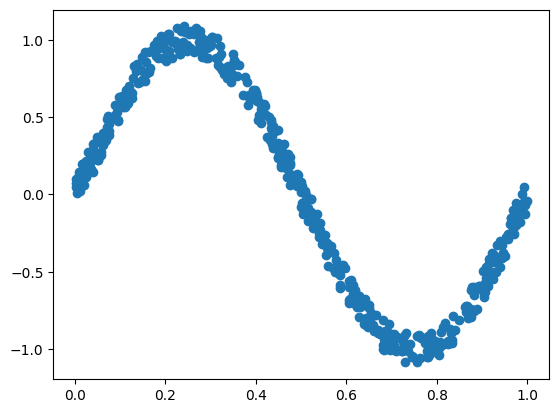

In [117]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
data = pd.read_csv("data/myData/data_3d.csv")
plt.scatter(data['X'],data['Y'])

In [118]:
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, file):
        self.data = pd.read_csv(file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = torch.tensor([self.data.iloc[idx, 1]]).float()
        Y = torch.tensor([self.data.iloc[idx, 2]]).float()
        return X, Y


In [119]:
training_data = CustomDataset("data/myData/data_3d.csv")
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)

In [120]:
import torch
from torch import nn

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


#### 定义类

双层神经元

In [121]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 4)  # 输入维度为 1，输出维度为 1
        self.relu = nn.Sigmoid()
        self.linear2 = torch.nn.Linear(4, 1)  # 输入维度为 1，输出维度为 1

    def forward(self, x):
        y_pred = self.linear(x)
        y_pred = self.relu(y_pred)
        y_pred = self.linear2(y_pred)
        return y_pred

#### 激活函数
- Sigmoid函数：Sigmoid函数是一种常用的非线性激活函数，其数学形式为$f(x)=\frac{1}{1+e^{-x}}$。它的输出范围在0到1之间，可以用于二分类问题。
- ReLU函数：ReLU函数是一种非线性激活函数，其数学形式为$f(x)=max(0,x)$。它在$x>0$时输出$x$，在$x\leq 0$时输出0。ReLU函数计算速度快，可以加速神经网络的训练过程。
- LeakyReLU函数：LeakyReLU函数是一种改进的ReLU函数，其数学形式为$f(x)=max(ax,x)$，其中$a$是一个小于1的常数。当$x\leq 0$时，LeakyReLU函数会输出一个非零的值，避免了ReLU函数在$x<0$时出现的“神经元死亡”现象。
- Tanh函数：Tanh函数是一种常用的非线性激活函数，其数学形式为$f(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$。它的输出范围在-1到1之间，可以用于多分类问题。
- Softmax函数：Softmax函数是一种常用的激活函数，主要用于多分类问题。其数学形式为$f(x_{i})=\frac{e^{x_{i}}}{\sum_{j=1}^{K}e^{x_{j}}}$，其中$x_{i}$表示第$i$个神经元的输出，$K$表示神经网络的输出层大小。Softmax函数会将所有输出映射到一个概率分布上，保证所有输出的和为1。

#### 损失函数
- nn.MSELoss：均方误差损失函数，用于回归任务。  
- nn.CrossEntropyLoss：交叉熵损失函数，用于多分类任务。  
- nn.BCELoss：二元交叉熵损失函数，用于二分类任务。  
- nn.NLLLoss：负对数似然损失函数，通常用于文本分类任务。  
- nn.KLDivLoss：KL 散度损失函数，用于计算两个概率分布之间的距离。  
- nn.SmoothL1Loss：平滑 L1 损失函数，与均方误差损失函数类似，但对离群值的惩罚更小，适用于回归任务。

In [122]:
#将模型添加到GPU
model = NeuralNetwork().to(device)
# 定义损失函数和优化器
# 均方差
criterion = torch.nn.SmoothL1Loss()
# 随机梯度下降
optimizer = torch.optim.SGD(model.parameters(), lr=0.55)
# model.parameters()用于返回模型中所有可训练的参数

训练模型

In [123]:
num_epochs = 300
loss_arr = []
for epoch in range(num_epochs):
        #模型进入训练模式
        model.train()
        #遍历数据
        for batch, (inputs, targets) in enumerate(train_dataloader):
                #将数据添加到GPU
                inputs, targets = inputs.to(device), targets.to(device)
                # 前向传播
                pred = model(inputs)
                # loss计算
                loss = criterion(pred, targets)
                # 梯度清零
                optimizer.zero_grad()
                # 反向传播
                loss.backward()
                # 更新参数的值
                optimizer.step()
                # 输出数据
                print('迭代: [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
                loss_arr.append(loss.item())

迭代: [1/200], Loss: 0.2331
迭代: [1/200], Loss: 0.2432
迭代: [1/200], Loss: 0.2680
迭代: [1/200], Loss: 0.2863
迭代: [1/200], Loss: 0.2678
迭代: [1/200], Loss: 0.2103
迭代: [1/200], Loss: 0.3050
迭代: [1/200], Loss: 0.1961
迭代: [1/200], Loss: 0.4055
迭代: [1/200], Loss: 0.2607
迭代: [1/200], Loss: 0.2306
迭代: [1/200], Loss: 0.3077
迭代: [1/200], Loss: 0.2877
迭代: [1/200], Loss: 0.1636
迭代: [1/200], Loss: 0.3388
迭代: [1/200], Loss: 0.2130
迭代: [1/200], Loss: 0.2372
迭代: [1/200], Loss: 0.1758
迭代: [1/200], Loss: 0.2295
迭代: [1/200], Loss: 0.2779
迭代: [1/200], Loss: 0.1300
迭代: [1/200], Loss: 0.2584
迭代: [1/200], Loss: 0.2220
迭代: [1/200], Loss: 0.2402
迭代: [1/200], Loss: 0.1654
迭代: [1/200], Loss: 0.1291
迭代: [1/200], Loss: 0.2744
迭代: [1/200], Loss: 0.2324
迭代: [1/200], Loss: 0.2648
迭代: [1/200], Loss: 0.3160
迭代: [1/200], Loss: 0.2539
迭代: [1/200], Loss: 0.2200
迭代: [1/200], Loss: 0.1994
迭代: [1/200], Loss: 0.2944
迭代: [1/200], Loss: 0.1979
迭代: [1/200], Loss: 0.1886
迭代: [1/200], Loss: 0.2541
迭代: [1/200], Loss: 0.1390
迭代: [1/200],

#### 可视化loss

(0.0, 0.5)

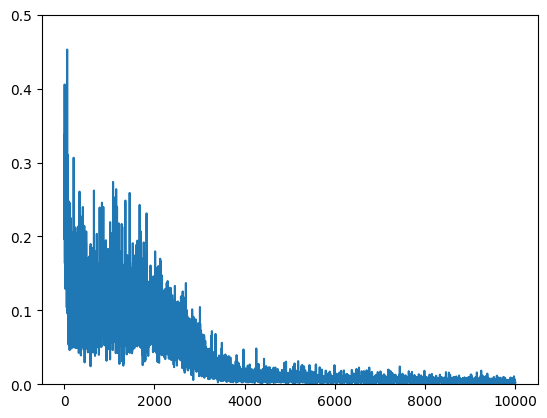

In [124]:
plt.plot(loss_arr)
plt.ylim(0,0.5)

#### 测试代码
测试数据的dataSet

In [125]:
import numpy as np
class PredDataset(Dataset):
    def __init__(self):
        self.u = np.linspace(0, 1, 50)
    def __len__(self):
        return len(self.u)

    def __getitem__(self, idx):
        X = torch.tensor([self.u[idx]]).float()
        return X
pred_data = PredDataset()
pred_dataloader = DataLoader(pred_data, batch_size=len(pred_data), shuffle=False)

测试：

In [126]:
def test(dataloader, model):
    model.eval()
    with torch.no_grad():
        for X in dataloader:
            X = X.to(device)
            pred = model(X)
            return pred
plot_y = test(pred_dataloader,model)

#### 结果可视化

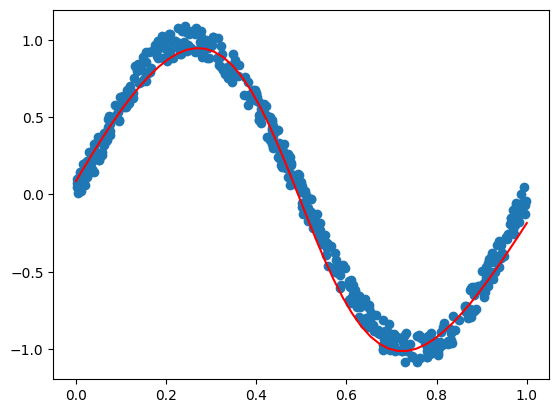

In [127]:
plt.scatter(data['X'],data['Y'])
plot_y = plot_y.cpu()
plt.plot(pred_data.u,plot_y.reshape(-1),'r')